<h2>Gradient Boosting</h2>

In [1]:
# load data
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

data = np.loadtxt('data_2.csv', delimiter = ',')
np.random.shuffle(data)

X = np.delete(data, 6, axis = 1) # pred[i][j]
y = np.delete(data, [0, 1, 2, 3, 4, 5], axis = 1) # klase[i][0] - classes 0 and 1

def column(matrix, p):
    return np.array([row[p] for row in matrix])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% (499) training and 30% (215) test

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 20)]

learning_rate = [0.001, 0.005, 0.1, 0.2, 0.5]

max_depth = [int(x) for x in np.linspace(3, 50, num = 20)]
max_depth.append(None)

param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

In [3]:
rf = GradientBoostingClassifier()

rf_random = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

rf_random.fit(X_train, y_train.ravel())

rf_random.best_params_

Fitting 5 folds for each of 2100 candidates, totalling 10500 fits


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 17}

In [4]:
optimal_max_depth = 3         # optimal 3
optimal_learning_rate = 0.1   # optimal 0.1
optimal_n_estimators = 10     # optimal 24

clf = GradientBoostingClassifier(max_depth = optimal_max_depth, learning_rate = optimal_learning_rate, n_estimators = optimal_n_estimators)

clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

print("Tacnost:", metrics.accuracy_score(y_test, y_pred) * 100) # 0.8558139534883721 the best possible accuracy

Tacnost: 82.7906976744186


Tacnost za: 3 je: 82.7906976744186
Tacnost za: 5 je: 80.93023255813954
Tacnost za: 7 je: 81.86046511627907
Tacnost za: 10 je: 78.6046511627907
Tacnost za: 12 je: 75.81395348837209
Tacnost za: 15 je: 75.34883720930232
Tacnost za: 17 je: 73.95348837209302
Tacnost za: 20 je: 74.4186046511628
Tacnost za: 22 je: 73.0232558139535
Tacnost za: 25 je: 73.95348837209302
Tacnost za: 27 je: 75.34883720930232
Tacnost za: 30 je: 73.48837209302326
Tacnost za: 32 je: 73.48837209302326
Tacnost za: 35 je: 73.95348837209302
Tacnost za: 37 je: 72.55813953488372
Tacnost za: 40 je: 73.95348837209302
Tacnost za: 42 je: 73.0232558139535
Tacnost za: 45 je: 72.55813953488372
Tacnost za: 47 je: 73.0232558139535
Tacnost za: 50 je: 73.95348837209302


([<matplotlib.axis.XTick at 0x24ba017f790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

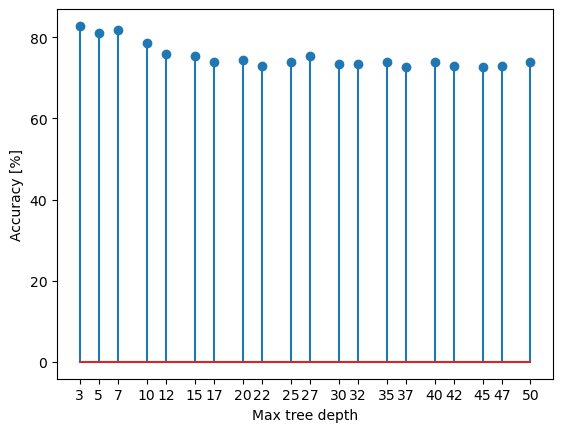

In [5]:
optimal_max_depth_pt2 = np.linspace(3, 50, 20, dtype = int)
y_osa = []
x_osa = optimal_max_depth_pt2

for i in range(0, len(optimal_max_depth_pt2)):
    clf = GradientBoostingClassifier(max_depth = optimal_max_depth_pt2[i], learning_rate = optimal_learning_rate, n_estimators = optimal_n_estimators)

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_test)

    print("Tacnost za:", optimal_max_depth_pt2[i], "je:", metrics.accuracy_score(y_test, y_pred) * 100)
    y_osa.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
fig = plt.figure()
ax = fig.add_subplot()
y = y_osa
xt = x_osa
ax.stem(xt, y)
plt.xlabel('Max tree depth')
plt.ylabel('Accuracy [%]')
plt.xticks(x_osa)

Tacnost za 0.001 je: 62.32558139534884
Tacnost za 0.01 je: 62.32558139534884
Tacnost za 0.1 je: 82.7906976744186
Tacnost za 0.2 je: 82.7906976744186
Tacnost za 0.5 je: 81.3953488372093


([<matplotlib.axis.XTick at 0x24b9fd11640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

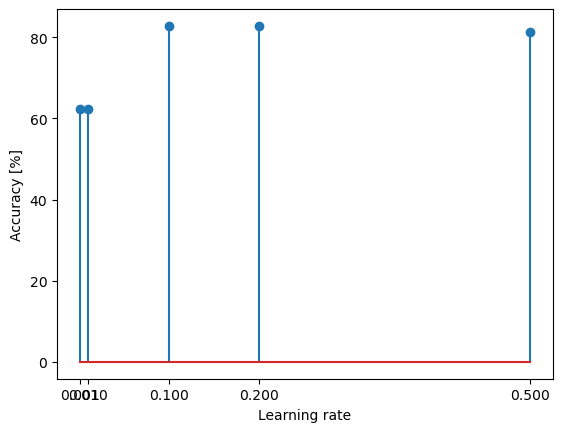

In [7]:
optimal_learning_rate_pt2 = [0.001, 0.01, 0.1, 0.2, 0.5]
yy_osa = []
xx_osa = optimal_learning_rate_pt2

for i in range(0, len(optimal_learning_rate_pt2)):
    clf = GradientBoostingClassifier(max_depth = optimal_max_depth, learning_rate = optimal_learning_rate_pt2[i], n_estimators = optimal_n_estimators)

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_test)

    print("Tacnost za", optimal_learning_rate_pt2[i], "je:", metrics.accuracy_score(y_test, y_pred) * 100)
    yy_osa.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
fig = plt.figure()
ax = fig.add_subplot()
y = yy_osa
xt = xx_osa
ax.stem(xt, y)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy [%]')
plt.xticks(xx_osa)

Tacnost za: 10 je: 82.7906976744186
Tacnost za: 17 je: 82.7906976744186
Tacnost za: 24 je: 82.7906976744186
Tacnost za: 32 je: 81.86046511627907
Tacnost za: 39 je: 81.3953488372093
Tacnost za: 46 je: 81.3953488372093
Tacnost za: 54 je: 81.86046511627907
Tacnost za: 61 je: 81.86046511627907
Tacnost za: 68 je: 82.32558139534883
Tacnost za: 76 je: 81.86046511627907
Tacnost za: 83 je: 82.32558139534883
Tacnost za: 91 je: 83.72093023255815
Tacnost za: 98 je: 82.7906976744186
Tacnost za: 105 je: 81.86046511627907
Tacnost za: 113 je: 81.86046511627907
Tacnost za: 120 je: 82.32558139534883
Tacnost za: 127 je: 83.25581395348837
Tacnost za: 135 je: 82.7906976744186
Tacnost za: 142 je: 83.25581395348837
Tacnost za: 150 je: 82.32558139534883


([<matplotlib.axis.XTick at 0x24ba009a4c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

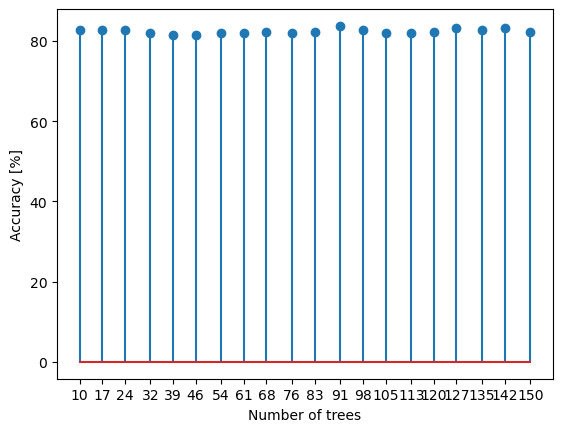

In [8]:
optimal_n_estimators_pt2 = np.linspace(10, 150, 20, dtype = int)
yyy_osa = []
xxx_osa = optimal_n_estimators_pt2

for i in range(0, len(optimal_n_estimators_pt2)):
    clf = GradientBoostingClassifier(max_depth = optimal_max_depth, learning_rate = optimal_learning_rate, n_estimators = optimal_n_estimators_pt2[i])

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_test)

    print("Tacnost za:", optimal_n_estimators_pt2[i], "je:", metrics.accuracy_score(y_test, y_pred) * 100)
    yyy_osa.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
fig = plt.figure()
ax = fig.add_subplot()
y = yyy_osa
xt = xxx_osa
ax.stem(xt, y)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy [%]')
plt.xticks(xxx_osa)